# Support Vector Machine Tutorial
---

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. - [reference](https://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html)
<img src="https://docs.opencv.org/2.4/_images/optimal-hyperplane.png", width=35%>

## Iris dataset
---

The [iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is a classic and very easy multi-class classification dataset.

<img src="https://i.imgur.com/plJFlkx.png", align="left", width=25%>


### Import library

In [373]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load Iris dataset

In [374]:
iris = datasets.load_iris()
print("Feature_naems: " + str(iris.feature_names))
print("Target_names: " + str(iris.target_names))

Feature_naems: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target_names: ['setosa' 'versicolor' 'virginica']


### Data preparing
In the begining, we choose two features to do the classification task.

In [375]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)','target']]
# iris_data = iris_data[iris_data['target'].isin([0,2])]
iris_data.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'sepal width (cm)']], iris_data[['target']], test_size=0.2, random_state=0)

### Standardization

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (eg Gaussian with 0 mean and unit variance).

In [377]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Import  svm model in the sklearn

Internally, the svm model in sklearn use [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) to handle all computations. <br>
Moreover, you could also use **NuSVM** or **LinearSVM** for further usage. (it would be mentioned later)

In [378]:
from sklearn.svm import SVC

### Kernel functions
In sklearn, there are four build-in kernel functions, ['linear', 'poly', 'rbf', 'sigmoid']((http://scikit-learn.org/stable/modules/svm.html#svm-kernels). <br>
Also, you could use your custom kernel function as well.

In [379]:
# Custom kernel function
def my_kernel(X, Y):
    return np.dot(X, Y.T)

svm = SVC(kernel=my_kernel, probability=True)
svm = SVC(kernel="linear",  probability=True)

In [380]:
svm.fit(X_train_std,y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Support vectors

In [381]:
for i, sv in enumerate(zip(svm.support_, svm.support_vectors_)):
    if i < 5:
        print("Index: %s; Support vector: %s" % (sv[0], sv[1]))

Index: 42; Support vector: [-0.56776627  0.80600783]
Index: 61; Support vector: [-1.63048304 -1.75151702]
Index: 63; Support vector: [-1.15816448 -0.12400121]
Index: 83; Support vector: [-0.56776627  0.80600783]
Index: 104; Support vector: [-1.04008484 -0.12400121]


### Number of **support vectors** in each class

In [382]:
svm.n_support_

array([ 6, 28, 26], dtype=int32)

In [383]:
print("Real labels in test set: %s" % y_test['target'].values)

Real labels in test set: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [384]:
print("Predictive results in test set: %s" % svm.predict(X_test_std))

Predictive results in test set: [1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0]


In [385]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1
print("Error rate = %s %%" % (error/X_test_std.size*100))

Error rate = 13.333333333333334 %


In [386]:
svm.predict_proba(X_test_std)

array([[  3.43383056e-02,   6.26075983e-01,   3.39585711e-01],
       [  2.37791687e-03,   5.63390501e-01,   4.34231582e-01],
       [  9.86138730e-01,   3.42980181e-03,   1.04314686e-02],
       [  2.55548395e-04,   1.27419908e-01,   8.72324544e-01],
       [  9.63820593e-01,   1.86166295e-02,   1.75627779e-02],
       [  3.97788516e-02,   4.24862095e-01,   5.35359053e-01],
       [  9.77369100e-01,   1.00839662e-02,   1.25469336e-02],
       [  4.59497441e-03,   2.84450443e-01,   7.10954583e-01],
       [  1.20204644e-03,   2.52470424e-01,   7.46327529e-01],
       [  1.31053420e-02,   5.16612451e-01,   4.70282207e-01],
       [  6.61180345e-03,   5.19654957e-01,   4.73733239e-01],
       [  1.91876525e-02,   3.91574965e-01,   5.89237383e-01],
       [  1.31053420e-02,   5.16612451e-01,   4.70282207e-01],
       [  3.43901932e-03,   3.57709607e-01,   6.38851373e-01],
       [  1.85945953e-02,   5.14206061e-01,   4.67199344e-01],
       [  9.02470976e-01,   6.73354759e-02,   3.0193547

### Plot the classification results

In [387]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

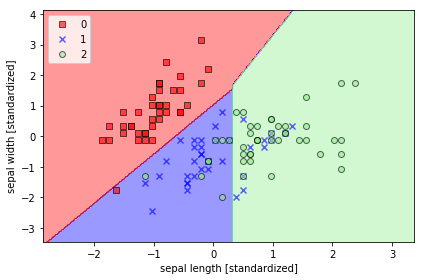

In [388]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Supplement
## Other svm models in sklearn

### [NuSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)
Similar to SVC but uses a parameter(nu) to control the number of support vectors.

- **nu** : float, optional (default=0.5)
    - An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].

In [389]:
from sklearn.svm import NuSVC
svm = NuSVC(nu=0.1, kernel="linear", probability=True)

### [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

Similar to SVC with parameter kernel=’linear’, but implemented in terms of [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

	
- **penalty** : string, ‘l1’ or ‘l2’ (default=’l2’)

    - Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

- **loss** : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)

    - Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.

- **dual** : bool, (default=True)

    - Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

In [390]:
from sklearn.svm import LinearSVC
linearSvm = LinearSVC(penalty='l1', loss='hinge', dual=False)